In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import random
from PIL import Image

In [7]:
load_dotenv()

data_path = os.environ.get('DATA_PATH')

In [8]:
total_samples = 0

for folder in os.listdir(data_path):
    print(folder, len(os.listdir(os.path.join(data_path, folder))))
    total_samples += len(os.listdir(os.path.join(data_path,folder)))

print('\n')
print('Total samples =>', total_samples)

Strawberry___healthy 1000
Grape___Black_rot 1180
Blueberry___healthy 1502
Cherry___Powdery_mildew 1052
Tomato___Target_Spot 1404
Peach___healthy 1000
Tomato___Late_blight 1909
Tomato___Tomato_mosaic_virus 1000
Orange___Haunglongbing_(Citrus_greening) 5507
Tomato___Leaf_Mold 1000
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 1076
Apple___Cedar_apple_rust 1000
Tomato___Bacterial_spot 2127
Grape___healthy 1000
Tomato___Early_blight 1000
Grape___Esca_(Black_Measles) 1383
Raspberry___healthy 1000
Tomato___healthy 1591
Tomato___Tomato_Yellow_Leaf_Curl_Virus 5357
Cherry___healthy 1000
Apple___Apple_scab 1001
Tomato___Spider_mites Two-spotted_spider_mite 1676
Background_without_leaves 1143
Peach___Bacterial_spot 2297
Tomato___Septoria_leaf_spot 1771
Squash___Powdery_mildew 1835
Apple___Black_rot 1000
Apple___healthy 1645
Strawberry___Leaf_scorch 1109


Total samples => 46565


In [9]:
print('Num. of class', len(os.listdir(data_path)))

Num. of class 29


In [10]:
def reformat_text(text):
    # Step 1: Replace multiple underscores with a single space
    text = text.replace("___", " ").replace("_", " ")
    
    # Step 2: Remove any leading or trailing spaces (if any)
    text = text.strip()
    
    return text

In [11]:
def visualize_dataset(folder_path, num_cols=5, image_extensions=("jpg", "jpeg", "png")):
    # Get list of folders (classes)
    folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

    # Calculate the number of rows based on the number of folders and specified number of columns
    num_rows = len(folders) // num_cols + (len(folders) % num_cols != 0)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    axes = axes.flatten()  # Flatten the axes array for easier access
    
    for i, folder in enumerate(folders):
        folder_full_path = os.path.join(folder_path, folder)
        
        # Get list of images in the folder
        images = [img for img in os.listdir(folder_full_path) if img.lower().endswith(image_extensions)]
        
        if images:  # Ensure there are images in the folder
            # Randomly select one image from the folder
            img_path = os.path.join(folder_full_path, random.choice(images))
            
            # Load the image using PIL
            img = Image.open(img_path)
            
            # Show the image in the subplot
            axes[i].imshow(img)
            axes[i].set_title(f"Class: {folder}", fontsize=10)
            axes[i].axis('off')  # Turn off axis
        
    # Hide any remaining subplots (if the number of folders is less than the total subplots available)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()



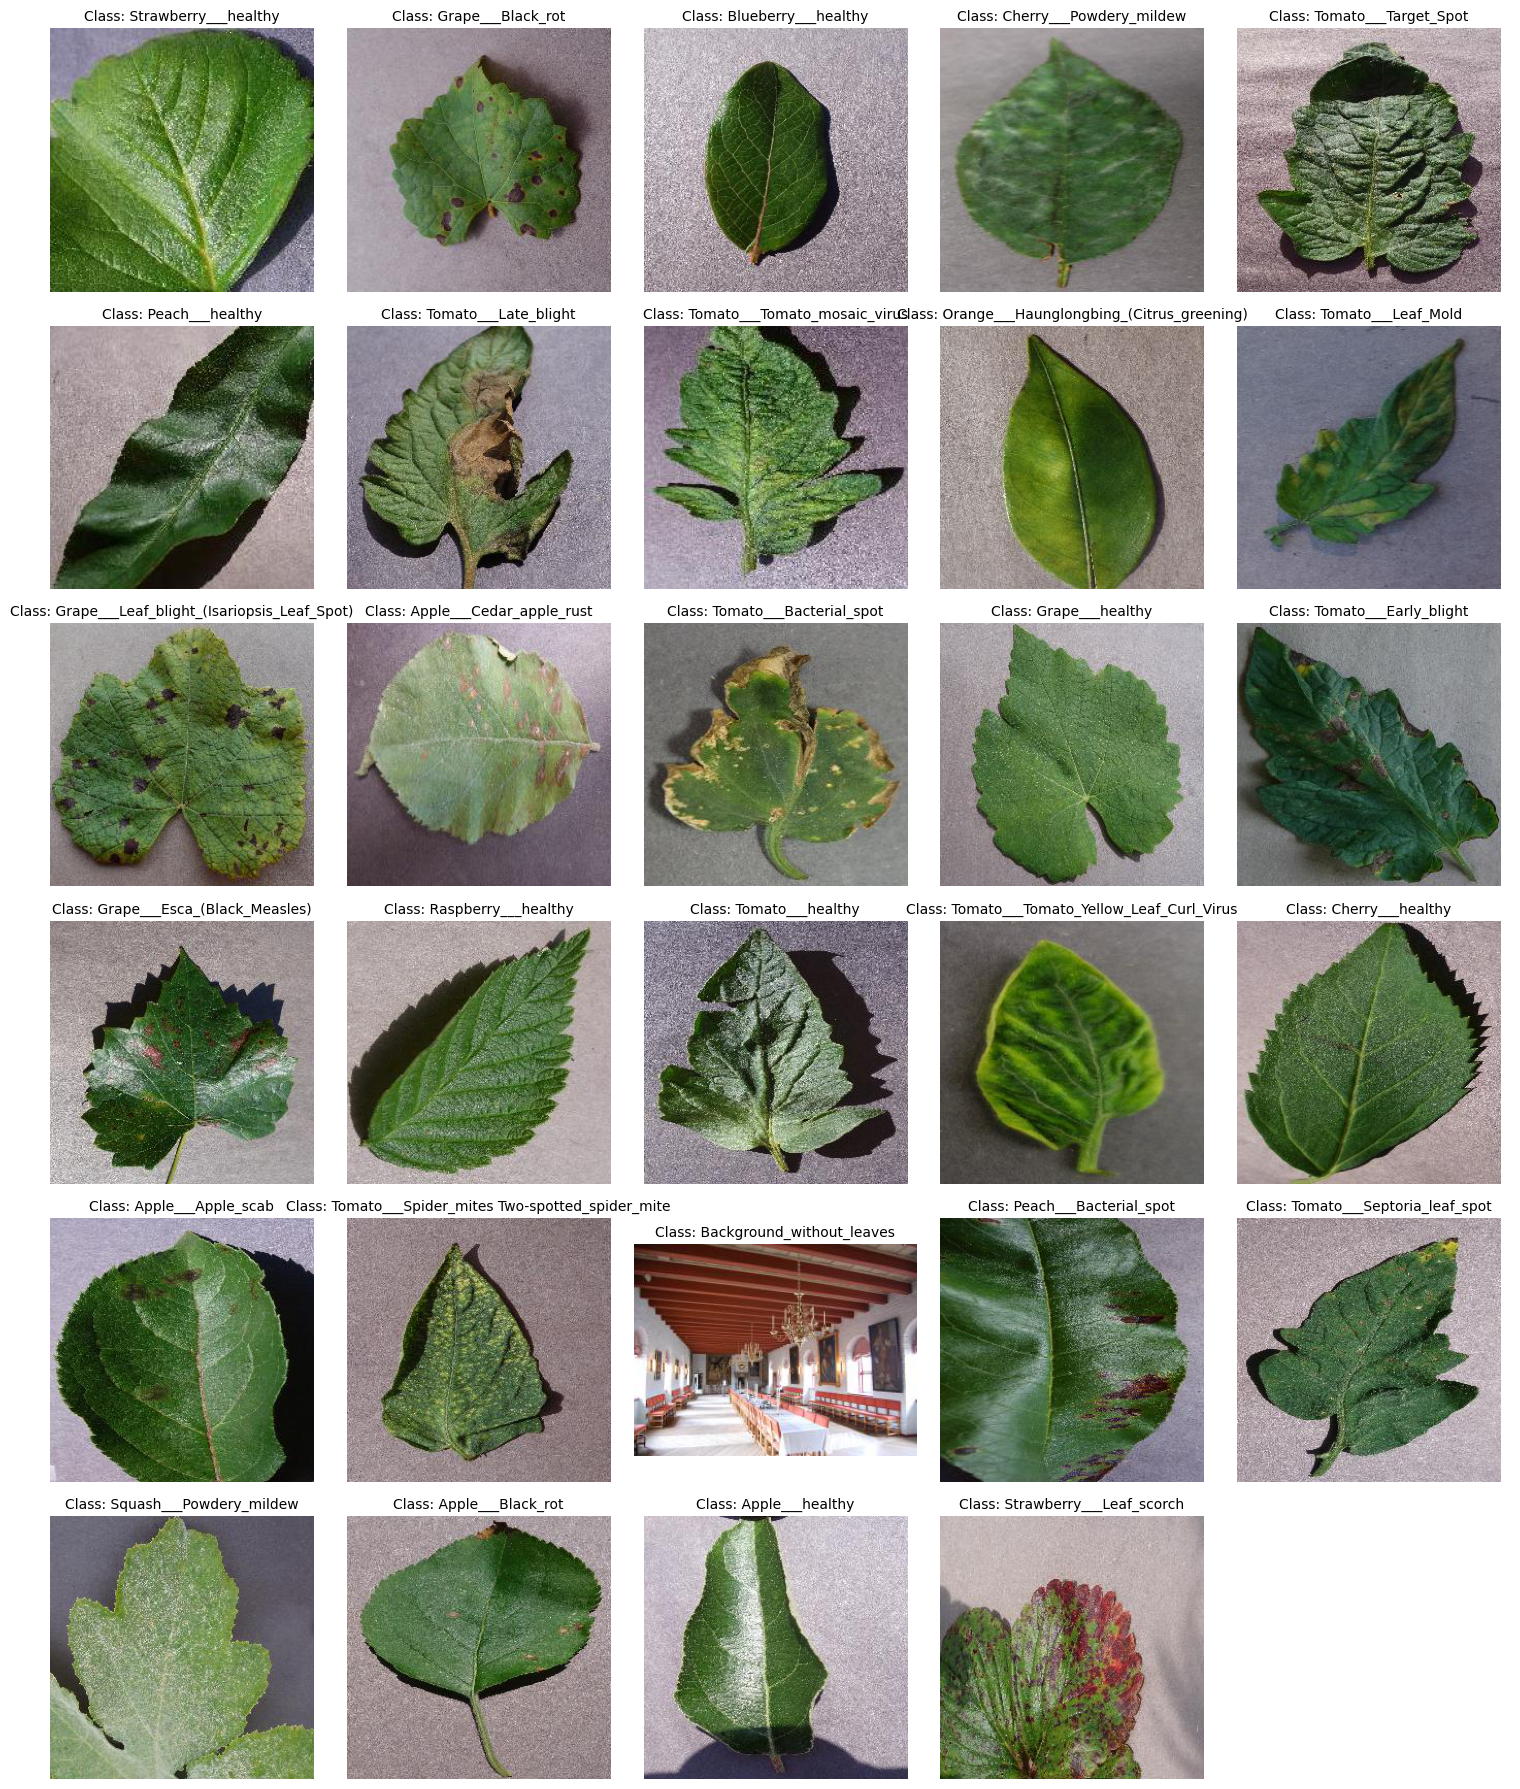

In [12]:
# Replace with the path to your main dataset folder
visualize_dataset(data_path)